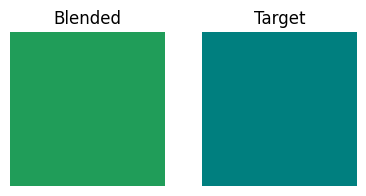

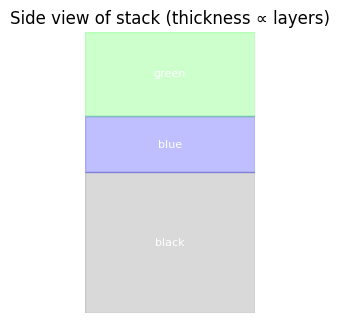

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Define available filaments (RGB in [0..1], alpha in [0..1])
filaments = {
    'black': {
        'rgb': [0.0, 0.0, 0.0],
        'alpha': 0.15,   # very translucent black
    },
    'blue': {
        'rgb': [0.0, 0.0, 1.0],
        'alpha': 0.25,   # semi-transparent blue
    },
    'green': {
        'rgb': [0.0, 1.0, 0.0],
        'alpha': 0.20,   # semi-transparent green
    },
    'red': {
        'rgb': [1.0, 0.0, 0.0],
        'alpha': 0.30,   # fairly translucent red
    },
    'white': {
        'rgb': [1.0, 1.0, 1.0],
        'alpha': 0.10,   # almost completely transparent white
    },
}

# 2) Choose a base color (underneath layer 0)
base_color = [1.0, 1.0, 1.0]  # white background

# 3) Define a target color for comparison
target_color = [0.0, 0.5, 0.5]  # custom teal

# 4) Define how you stack: a list of (filament_name, thickness) from bottom → top
stack_plan = [
    ('black', 5),  # 5 layers of black
    ('blue',  2),  # 2 layers of blue
    ('green', 3),  # 3 layers of green
]

# Helper functions for blending
def composite_over(base_rgb, top_rgb, top_alpha):
    return top_alpha * top_rgb + (1 - top_alpha) * base_rgb

def effective_alpha(alpha_per_layer, thickness):
    return 1 - (1 - alpha_per_layer) ** thickness

def blend_stack(filaments, base_color, stack_plan):
    current_rgb = np.array(base_color, dtype=float)
    for name, thickness in stack_plan:
        desc = filaments[name]
        rgb = np.array(desc['rgb'], dtype=float)
        per_layer_alpha = desc['alpha']
        net_alpha = effective_alpha(per_layer_alpha, thickness)
        current_rgb = composite_over(current_rgb, rgb, net_alpha)
    return current_rgb

# Compute the blended color
blended = blend_stack(filaments, base_color, stack_plan)

# 5) Show a side-by-side comparison of the blended vs. target
fig1, axes = plt.subplots(1, 2, figsize=(4, 2))
axes[0].imshow(np.ones((10,10,3)) * blended.reshape((1,1,3)))
axes[0].set_title("Blended")
axes[1].imshow(np.ones((10,10,3)) * np.array(target_color).reshape((1,1,3)))
axes[1].set_title("Target")
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

# 6) Visualize the stack from the side
total_thickness = sum(thickness for name, thickness in stack_plan)
fig2, ax2 = plt.subplots(figsize=(2, max(3, total_thickness / 3)))
y_bottom = 0
for name, thickness in stack_plan:
    rgb = filaments[name]['rgb']
    alpha = filaments[name]['alpha']
    rect = plt.Rectangle((0, y_bottom), 1, thickness, color=(rgb[0], rgb[1], rgb[2], alpha))
    ax2.add_patch(rect)
    # Choose text color for readability (white on dark, black on light)
    brightness = sum(rgb) / 3
    text_color = 'white' if brightness < 0.5 else 'black'
    ax2.text(0.5, y_bottom + thickness / 2, name, va='center', ha='center', color=text_color, fontsize=8)
    y_bottom += thickness

ax2.set_xlim(0, 1)
ax2.set_ylim(0, total_thickness)
ax2.axis('off')
ax2.set_title("Side view of stack (thickness ∝ layers)")
plt.tight_layout()
plt.show()
